In [1]:
#import required functions
import warnings
warnings.filterwarnings("ignore")
import math
import os
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import pylab as plt
import numpy as np
from IPython.display import Image
import matplotlib as matplotlib
import datetime
from pandas import DataFrame
from openpyxl import load_workbook
from openpyxl.drawing.image import Image
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import itertools
from fbprophet import Prophet
from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler
import xlrd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from sklearn.gaussian_process import GaussianProcessRegressor
from fbprophet import Prophet

from sklearn.preprocessing import StandardScaler
import xlrd

In [2]:
def fn_addnoise(data):
    i = len(data)
    # create 1D numpy data:
    npdata = np.asarray(data).reshape((i))
    # add uniform noise:
    u = npdata + np.random.uniform(size=npdata.shape)
    # add laplace noise:
    p = npdata + np.random.laplace(loc=0.0, scale=1.0, size=npdata.shape)

    print(npdata)
    print(u)
    print(p)
    return u,p

In [3]:
client='petergrimm'
weeklysales= pd.read_excel('/Users/JoyThompson/Desktop/'+ client+'/input/weeklysales.xlsx', sheetname='Sheet1')  
weeklysales=weeklysales.loc[:,['Date', 'Units Ordered']]
saleslist=weeklysales['Units Ordered']
print(weeklysales)
print(saleslist)

         Date  Units Ordered
0  2018-02-11              3
1  2018-02-18             10
2  2018-02-25             11
3  2018-03-04             23
4  2018-03-11             23
5  2018-03-18             13
6  2018-03-25             32
7  2018-04-01             44
8  2018-04-08             36
9  2018-04-15             56
10 2018-04-22             78
11 2018-04-29            106
12 2018-05-06             66
13 2018-05-13             78
14 2018-05-20             53
15 2018-05-27             85
16 2018-06-03             93
17 2018-06-10            141
18 2018-06-17            101
19 2018-06-24            138
20 2018-07-01            184
21 2018-07-08            238
22 2018-07-15            157
23 2018-07-22            131
24 2018-07-29            159
25 2018-08-05            150
26 2018-08-12            140
27 2018-08-19            126
28 2018-08-26            104
29 2018-09-02             77
..        ...            ...
55 2019-03-03            116
56 2019-03-10            132
57 2019-03-17 

In [84]:
salesmat=np.ones((len(saleslist),50))
salesmato=np.ones((len(saleslist),50))
print(salesmat)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [85]:
noisec=0
for num in range(0, 25):
    uni, random = fn_addnoise(saleslist)
    uc=0
    for u in uni:
        if u<=0:
            uni[uc]=0
        uc=uc+1
    ur=0
    for r in random:
        print(r)
        if r<=0:
            random[ur]=0
        ur=ur+1
    noisec2=noisec+1
    salesmat[:,noisec]=uni  
    salesmat[:,noisec2]=random
    salesmato[:,noisec]=saleslist  
    salesmato[:,noisec2]=saleslist
    noisec=noisec+2
print(salesmat)
print(salesmato)

[  3  10  11  23  23  13  32  44  36  56  78 106  66  78  53  85  93 141
 101 138 184 238 157 131 159 150 140 126 104  77  84  98 102 117  91 124
 125  87  82  93 115 132 136 177 238 110  98 102  96  83  77 107 117 133
 119 116 132 137 181 201 219 173 137 245 213 189 150 147 192 242 233 169
 138 105 129 208 186 195 191 201 178 129 118 100 111]
[  3.78314915  10.17094446  11.33891765  23.50112807  23.22644228
  13.55432076  32.05383197  44.89763051  36.9009487   56.52821453
  78.15014566 106.63045038  66.5961979   78.58242801  53.08086203
  85.97708857  93.87822292 141.23526583 101.89689879 138.09695431
 184.35925209 238.02937529 157.44208324 131.72703617 159.48667492
 150.60194379 140.23975489 126.27440973 104.68243535  77.30071461
  84.75351112  98.44735192 102.38678462 117.39833219  91.92934033
 124.70907667 125.97954476  87.30187811  82.93747195  93.76895058
 115.65375498 132.45895449 136.90132463 177.46776297 238.58629113
 110.39934893  98.33796285 102.07093905  96.79369833  83.696

[3, 10, 11, 23, 23, 13, 32, 44, 36, 56, 78, 106, 66, 78, 53, 85, 93, 141, 101, 138, 184, 238, 157, 131, 159, 150, 140, 126, 104, 77, 84, 98, 102, 117, 91, 124, 125, 87, 82, 93, 115, 132, 136, 177, 238, 110, 98, 102, 96, 83, 77, 107, 117, 133, 119, 116, 132, 137, 181, 201, 219, 173, 137, 245, 213, 189, 150, 147, 192, 242, 233, 169, 138, 105, 129, 208, 186, 195, 191, 201, 178, 129, 118, 100, 111]
0.99964970059331
[  3.05112631  10.43734495  11.38541173  23.35254764  23.11959053
  13.3322129   32.35028466  44.07644415  36.44344394  56.21392767
  78.19510292 106.4253383   66.31675287  78.29434603  53.4867027
  85.27432546  93.03023301 141.14665021 101.27505265 137.9732008
 184.44358196 238.13366102 157.18710947 131.48955338 159.00428298
 150.39049407 140.33953428 125.96375307 104.13066903  77.18841225
  84.0154085   98.14505515 102.32477165 117.13763358  91.21831812
 124.43508311 125.22351857  87.23107172  82.16093014  93.33907184
 115.27472354 132.44985034 136.25345707 177.20379109 238.41

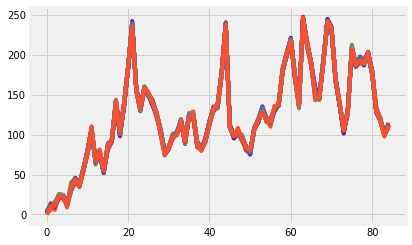

In [86]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
gaus=GaussianProcessRegressor(kernel= 1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)))
sal=np.corrcoef(salesmat)

sal=sal[0].reshape(-1, 1)
wek=weeklysales['Units Ordered']
week=np.linspace(0,84,85)

week=week.reshape(-1,1)

vecsal=[]
for inds in weeklysales.index:
    s=weeklysales.loc[inds, 'Units Ordered']
    vecsal.append(s)
print(vecsal)

gaus.fit(week, salesmat)
y=gaus.predict(week)
ymean=y.mean(axis=1)
sc=gaus.score(week, salesmato)
print(sc)
print(ymean)
print(weeklysales['Units Ordered'])
plt.plot(week,y)


In [ ]:
newsales=pipfit(ws2)

In [ ]:
from sklearn.metrics import r2_score
import scipy.interpolate 
from sklearn.model_selection import cross_val_score
def pipfit(ws2):
    datelist=ws2.index
    
    ws2c=ws2.resample('W-SUN')
    f1=ws2c.interpolate(method='linear', axis=1)
    print(f1)
    scorefun1=cross_val_score(ws2copy.values, f1.values, cv=3)
    ws3=ws2.resample('W-SUN')
    f2=ws3.interpolate(method='spline', order=2) 
    print(f2)
    scorefun2=r2_score(ws2copy.values, f2.values)
    ws4=ws2.resample('W-SUN')
    f3=ws4.interpolate(method='spline', order=1)
    scorefun3=r2_score(ws2copy.values, f3.values)
    ws5=ws2.resample('W-SUN')
    f4=ws5.interpolate(method='spline', order=3) 
    scorefun4=r2_score(ws2copy.values, f4.values)
    ws6=ws2.resample('W-SUN')
    f5=ws6.interpolate(method='spline', order=4)
    scorefun5=r2_score(ws2copy.values, f5.values)
    ws7=ws2.resample('W-SUN')
    f6=ws7.interpolate(method='spline', order=5)
    scorefun6=r2_score(ws2copy.values, f6.values)
    ws8=ws2.resample('W-SUN')
    f7=ws8.interpolate(method='cubic') 
    
    scorefun7=r2_score(ws2copy.values, f7.values)
    ws9=ws2.resample('W-SUN')
    f8=ws9.interpolate(method='time')
    scorefun8=r2_score(ws2copy.values, f8.values)
    ws10=ws2.resample('W-SUN')
    f9=ws10.interpolate(method='nearest')
    scorefun9=r2_score(ws2copy.values, f9.values)
    listfunc=[f1,f2,f3,f4,f5,f6,f7,f8,f9]

    scorelist=[]
    fitfunlist=[]
    for func in listfunc:

        fitfunlist.append(func)
        scorefun=r2_score(ws2copy.values, func.iloc[:,0])  
        scorelist.append(scorefun)
    print(scorelist)
        
    scoreind=scorelist==max(scorelist)
    print(scoreind)
    fitfunyes=fitfunlist[scoreind]
  

    newsales=pd.DataFrame({'Date':datelist,'y':fitfunyes})
 
    return newsales

In [ ]:
salesmat2=salesmat.mean(axis=1)
print(salesmat2)
weeklysales2=weeklysales
weeklysales2['Units Ordered']=salesmat2
ws2=weeklysales2.set_index('Date')
ws2copy=ws2
print(ws2)

In [ ]:
print(salesmat)
corrsales = np.corrcoef(salesmat)
print(corrsales)
transformer = StandardScaler()
transformer=transformer.fit(salesmat)
# difference transform
xweekx = transformer.transform(salesmat)

xweekx2=xweekx.mean(axis=1)

print(xweekx)
print(xweekx2)


In [ ]:
pipeline=make_pipeline(GaussianProcessRegressor(kernel= 1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3))),
                           interpolate(method='linear', axis=0), interpolate(method='spline', order=2), 
                           interpolate(method='spline', order=1), interpolate(method='spline', order=3), 
                           interpolate(method='spline', order=4), interpolate(method='spline', order=5), 
                           interpolate(method='cubic'), interpolate(method='time'), 
                           interpolate(method='nearest'), PolynomialFeatures(4), PolynomialFeatures(8), 
                          PolynomialFeatures(10), PolynomialFeatures(12)
    